<a href="https://colab.research.google.com/github/gtsagkatakis/Data-Science-and-Applications/blob/main/485_week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will provide an introduction to:
 - Gradient Descent
 - Back Propagation
 - Regrassion and Classification Examples

 ![](https://b2633864.smushcdn.com/2633864/wp-content/uploads/2021/04/gradient_descent_variations_nn.png?lossy=2&strip=1&webp=1)

#**Gradient Descent**
Gradient Descent (GD) is an iterative optimization algorithm used to find the minimum value of a function. It tweaks the model’s parameters iteratively to minimize the cost function

#### **Cost Function:**
 The cost function is a metric that represents an error. There are many cost functions that we can use for `regression`, such as mean square error `(MSE)`, root mean square error `(RMSE)`, mean absolute error `(MAE)`, etc. In this tutorial, we’re going to use MSE because of its simplicity and because it guarantees a global minima.

#### **Number of epochs:**
  It is a `hyperparameter` that represents the number of iterations to be run, i.e., the `number of times the gradients` are to be computed for `updating the model’s parameters`. When all the training data passes through this entire process once, then it is known as one epoch. The cost function keeps getting smaller after each epoch if we use a good learning rate.

  #### **Learning Rate:**
  It is a `hyperparameter` that refers to the `size of the update step`. If it is too large, the algorithm diverges instead of converging, i.e., the cost value tends to increase. If it is too small, the algorithm requires a very large number of iterations to converge.






One thing to note is that we do not use an activation function on the input directly or on the output. You should never use activation functions directly on the input, i.e. `F.relu(x)`.

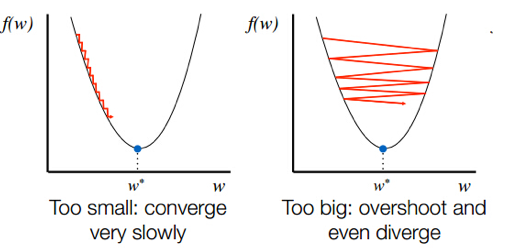

#Back propagation

##Gradient & Back propagation Pipeline
1.  Take the derivative of the Loss Function for each parameter in it. In ML lingo, take the Gradient of the Loss Function.
2.  Pick random values for the parameters.
3.  Plug the paramenter values into the derivatives (Gradient).
4.  Calculate the Step Sizes: Step Size = Slope * Learning Rate.
5.  Calculate the New Parameters (e.g. intercept): NewParameter = Old Parameter - Step Size.
6.  Go back to step 3 and repeat untill Step Size is very small, or when the Maximum Number of Steps is reached.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*JCz4xZNLbwuDDl4XbgRTfA.png)

#Chain Rule
 In order for the loss to be propagated to the other gates, we need to find ∂L/∂x and ∂L/∂y.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*NpYmr8RwZ3x32GTBUkbB4A.png)




Toy Example

In [1]:
#Download the dataset
!wget https://raw.githubusercontent.com/towardsai/tutorials/master/gradient_descent_tutorial/data.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

column_names = ['Population', 'Profit']
df = pd.read_csv('data.txt', header=None, names=column_names)
df.head()


df.insert(0, 'Theta0', 1)
cols = df.shape[1]
X = df.iloc[:,0:cols-1]
Y = df.iloc[:,cols-1:cols]

theta = np.matrix(np.array([0]*X.shape[1]))
X = np.matrix(X.values)
Y = np.matrix(Y.values)
print(X)

--2024-03-05 09:17:31--  https://raw.githubusercontent.com/towardsai/tutorials/master/gradient_descent_tutorial/data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1359 (1.3K) [text/plain]
Saving to: ‘data.txt’

data.txt            100%[===================>]   1.33K  --.-KB/s    in 0s      

2024-03-05 09:17:31 (19.7 MB/s) - ‘data.txt’ saved [1359/1359]

[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.  

##Problem Formulation

What we do basically in Gradient descent is to update the parameters by minimizing the cost function $J(\theta)$. We iterate the updating process until we have the smallest error possible. To do so, we need to define our cost function first. So in this tutorial we define our cost function $J(\theta)$ as a half-Mean Square Errors$ (\frac{1}{2}MSE)$ between the hypothesis and the observations.

###The residual sum of squares (RSS) measures the level of variance in the error term, or residuals
$$J(θ) = \frac {1}{2m} * \sum_{i=1} ^ m (h_θ (x^{(i)}) - y^{(i)} ) ^2 $$

In [2]:
def calculate_RSS(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

When we are talking about the Gradient descent, we need to know first about what the gradient is. Actually, the gradient of a function f, denoted as $\nabla{f}$, is nothing but a vector of its partial derivative. Gradient of a multi-variable function f ${(\theta_0, \theta_1, \theta_2, ....., \theta_n )} $ is writen as in the following form:

![](https://machinelearningspace.com/wp-content/ql-cache/quicklatex.com-ebcccb6d22aea03f02215178fe76a84d_l3.svg)

Where $\partial$ is the partial derivative operator that differenciates a function with respect to one variable and treats the others as constants.

So, the gradient of $J({\theta)}$ can be written as $\nabla{J({\theta})}$.

In [3]:
def gradientDescent(X, Y, theta, alpha, iters):
    t = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - Y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            t[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term)) #update term

        theta = t
        cost[i] = calculate_RSS(X, Y, theta)

    return theta, cost

##Parameters Update Rule

We already know that the parameters will be updated iteratively in the opposite direction of $\nabla{J({\theta})}$ during the learning process. Therefore, we can define the update rule for the parameters as the following:

$$
\theta_{k+1} = \theta_k - \alpha  \nabla{J({\theta})}
$$
where $\alpha$  is the $\text{learning rate}$ that defines how far to go for each step. \alpha can range from $0$ to $1$ $( 0 <\alpha<1)$.

<Axes: xlabel='Population', ylabel='Profit'>

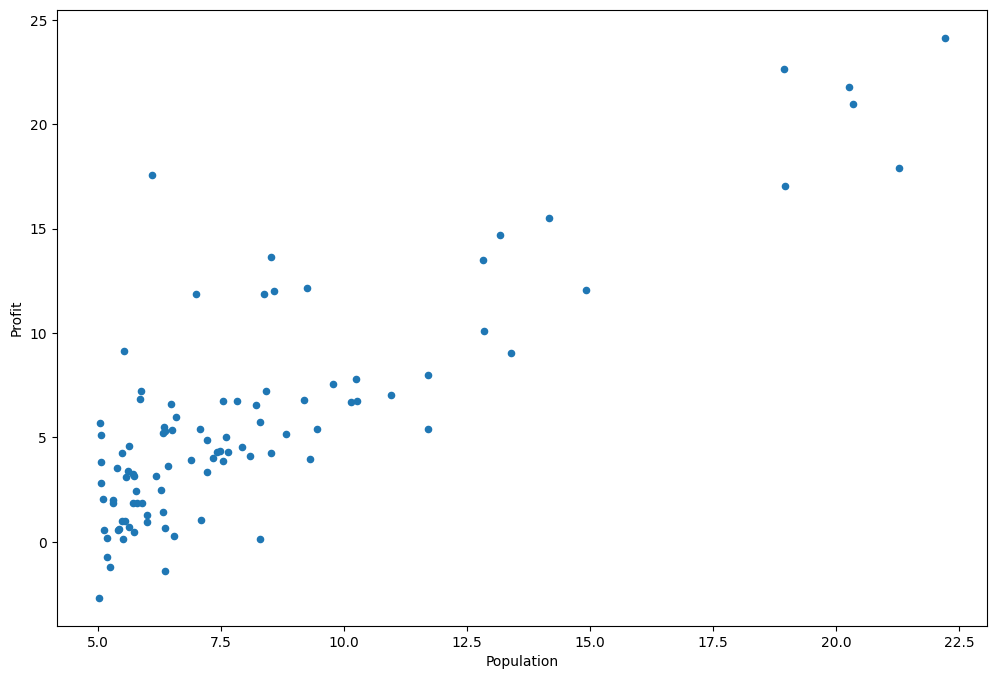

In [4]:

df.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

Error Before Gradient

In [5]:
error = calculate_RSS(X, Y, theta)
error

32.072733877455676

Apply Gradient

In [6]:
g, cost = gradientDescent(X, Y, theta, 0.01, 1000)
g

matrix([[-3.24140214,  1.1272942 ]])

Error After Applying Gradient

In [7]:
error = calculate_RSS(X, Y, g)
error

4.515955503078914

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

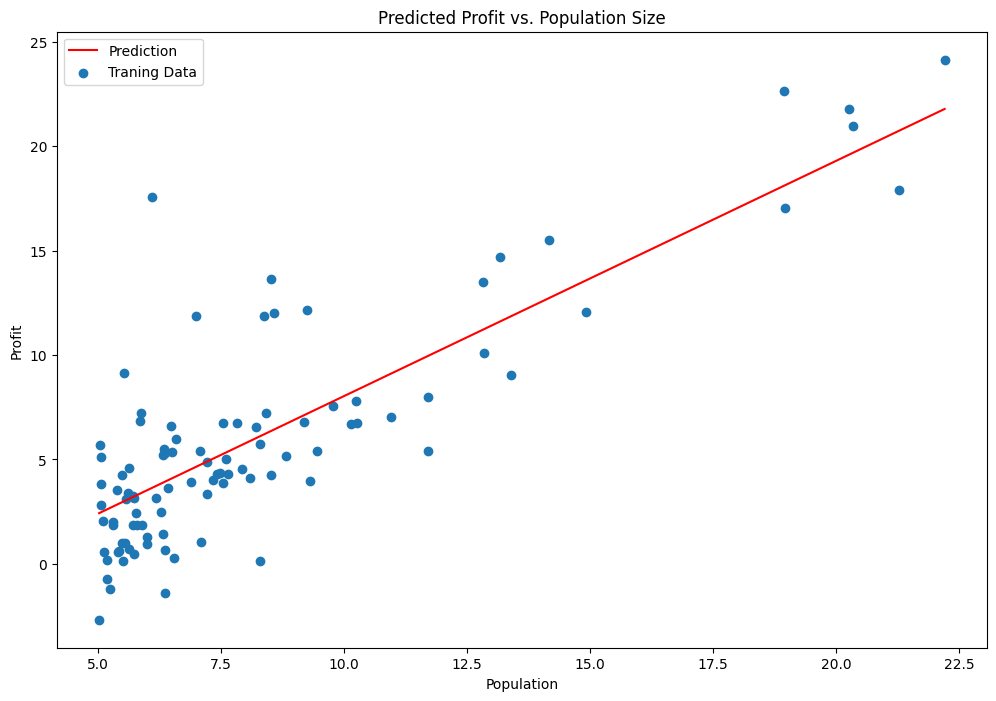

In [8]:
x = np.linspace(df.Population.min(), df.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df.Population, df.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')


##Regression:
 - Loss Function:

The Mean Squared Error (MSE):
 $$MSE= \frac {1}{n} \sum_{i=1} ^ n (yi−(mx_i+b)) ^ 2$$


 - Gradient Descent Objective:

The gradient descent update rules for parameters mm and bb:
$$
m:=m−α \frac {1}{n} \sum_{i=1} ^ n  = −2x_i(_yi−(mx_i+b)
)$$
$$
b:=b−α \frac {1}{n} \sum_{i=1} ^ n−2(y_i−(mx_i+b))
$$

Where α is the learning rate.
##Binary Classification:
- Loss Function:

Binary Cross-Entropy Loss (Log Loss):
$$
L(y,\hat{y})= − \frac {1}{n} \sum_{i=1} ^n (y_i log⁡(\hat{(y_i} )+(1−y_i)log⁡(1 − \hat{y_i}))
$$

- Gradient Descent Objective:

The gradient descent update rule for the parameter w:
$$
w:=w−α \frac{1}{n} \sum _{i=1} ^ n x_i (\hat{y_i} - y_i)
$$
##Multi-Class Classification:
 - Loss Function:
$$
L(y,\hat{y})= − \frac {1}{n} \sum_{i=1} ^n \sum_{j=1} ^C  (y_i log⁡(\hat{(y_i} )
$$

Cross-Entropy Loss (Softmax Loss):


Where C is the number of classes.
Gradient Descent Objective:

- The gradient descent update rule for the parameter $w_k$​:

$$
w_k:=w_k −α \frac{1}{n} \sum _{i=1} ^ n x_{ik} (\hat{y_{ik}} - y_{ik})
$$

Where k is the class index.

#Another Example

In [9]:
import pandas as pd #Python Data Analysis Library
import numpy as np #Python Scientific Library

In [10]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['sepal_length','sepal_width','petal_length','petal_width','iris_class']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   iris_class    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
y = dataset['iris_class']
x = dataset.drop(['iris_class'], axis=1)

print ("dataset : ",dataset.shape)
print ("x : ",x.shape)
print ("y : ",y.shape)

dataset :  (150, 5)
x :  (150, 4)
y :  (150,)


In this session, we will use a Multi-Layer Perceptron (MLP) Classifier. We need to encode our target attribute for Neural Network based classifier into one hot format. We can do this by calling the Pandas method get_dummies(y). With this method, we will convert:
Iris setosa: 100
Iris versicolor: 010
Iris virginica: 001

In [12]:
#one hot encoding
y=pd.get_dummies(y)
y.sample(7)

,Iris-setosa,Iris-versicolor,Iris-virginica
52,0,1,0
130,0,0,1
107,0,0,1
91,0,1,0
44,1,0,0
132,0,0,1
5,1,0,0


Split in training and testing

In [13]:
#Selective import Scikit Learn
from sklearn.model_selection import train_test_split

# Generate Training and Validation Sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) #0.3 data as data test

#converting to float 32bit
x_train = np.array(x_train).astype(np.float32)
x_test  = np.array(x_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

#print data split for validation
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(105, 4) (105, 3)
(45, 4) (45, 3)


For our machine learning, we will use the sklearn implementation of Multi-Layer Perceptron (A neural network architecture): https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html.

In [14]:
#Importing our model
from sklearn.neural_network import MLPClassifier

#model initialization
Model = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=2000, alpha=0.01, #try change hidden layer
                     solver='sgd', verbose=1,  random_state=121) #try verbode=0 to train with out logging
#train our model
h=Model.fit(x_train,y_train)
#use our model to predict
y_pred=Model.predict(x_test)

Iteration 1, loss = 2.40341715
Iteration 2, loss = 2.37245921
Iteration 3, loss = 2.33193050
Iteration 4, loss = 2.28524631
Iteration 5, loss = 2.23751810
Iteration 6, loss = 2.19042383
Iteration 7, loss = 2.14584260
Iteration 8, loss = 2.10363586
Iteration 9, loss = 2.06420728
Iteration 10, loss = 2.02829305
Iteration 11, loss = 1.99623194
Iteration 12, loss = 1.96881894
Iteration 13, loss = 1.94615118
Iteration 14, loss = 1.92756605
Iteration 15, loss = 1.91282570
Iteration 16, loss = 1.90175853
Iteration 17, loss = 1.89364240
Iteration 18, loss = 1.88782674
Iteration 19, loss = 1.88358449
Iteration 20, loss = 1.88041992
Iteration 21, loss = 1.87789635
Iteration 22, loss = 1.87557285
Iteration 23, loss = 1.87320511
Iteration 24, loss = 1.87064616
Iteration 25, loss = 1.86780715
Iteration 26, loss = 1.86464755
Iteration 27, loss = 1.86116441
Iteration 28, loss = 1.85739725
Iteration 29, loss = 1.85345445
Iteration 30, loss = 1.84932525
Iteration 31, loss = 1.84507111
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


After finishing the training process we can use our trained machine learning by using model.predict() method. To get our classification result we can import classification_report from sklearn.matrix and call classification_report(real_target, prediction). To show results in confusion matrix and accuracy you also need to import them from sklearn.matrix.

In [15]:
#scikit for machine learning reporting
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_pred)) # Print summary report
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))) # Print Confusion matrix
print('accuracy is ',accuracy_score(y_pred,y_test)) # Print accuracy score

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.90      0.90      0.90        10
           2       1.00      0.94      0.97        17

   micro avg       0.98      0.96      0.97        45
   macro avg       0.97      0.95      0.96        45
weighted avg       0.98      0.96      0.97        45
 samples avg       0.96      0.96      0.96        45

[[18  0  0]
 [ 1  9  0]
 [ 0  1 16]]
accuracy is  0.9555555555555556


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Last, if we want to show our machine learning loss history we can plot loss_curve_ property of our trained model.

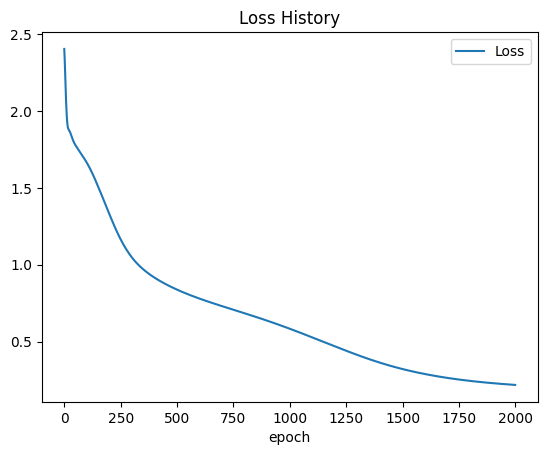

In [16]:
import matplotlib.pyplot as plt

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])

##Batch Gradient Decent
![](https://b2633864.smushcdn.com/2633864/wp-content/uploads/2021/04/gradient_descent_variations_batched_sgd_plot.png?lossy=2&strip=1&webp=1)





In [17]:
Model_batch = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=2000, alpha=0.01,
                            solver='sgd', batch_size='auto', verbose=1, random_state=121)
h_batch = Model_batch.fit(x_train, y_train)
y_pred_batch = Model_batch.predict(x_test)

Iteration 1, loss = 2.40341715
Iteration 2, loss = 2.37245921
Iteration 3, loss = 2.33193050
Iteration 4, loss = 2.28524631
Iteration 5, loss = 2.23751810
Iteration 6, loss = 2.19042383
Iteration 7, loss = 2.14584260
Iteration 8, loss = 2.10363586
Iteration 9, loss = 2.06420728
Iteration 10, loss = 2.02829305
Iteration 11, loss = 1.99623194
Iteration 12, loss = 1.96881894
Iteration 13, loss = 1.94615118
Iteration 14, loss = 1.92756605
Iteration 15, loss = 1.91282570
Iteration 16, loss = 1.90175853
Iteration 17, loss = 1.89364240
Iteration 18, loss = 1.88782674
Iteration 19, loss = 1.88358449
Iteration 20, loss = 1.88041992
Iteration 21, loss = 1.87789635
Iteration 22, loss = 1.87557285
Iteration 23, loss = 1.87320511
Iteration 24, loss = 1.87064616
Iteration 25, loss = 1.86780715
Iteration 26, loss = 1.86464755
Iteration 27, loss = 1.86116441
Iteration 28, loss = 1.85739725
Iteration 29, loss = 1.85345445
Iteration 30, loss = 1.84932525
Iteration 31, loss = 1.84507111
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


##Mini-Batch Gradient Decent
![](https://b2633864.smushcdn.com/2633864/wp-content/uploads/2021/04/gradient_descent_variations_mini_batch_sgd_plot.png?lossy=2&strip=1&webp=1)

In [18]:
Model_mini_batch = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=2000, alpha=0.01,
                                 solver='sgd', batch_size=64, verbose=1, random_state=121)
h_mini_batch = Model_mini_batch.fit(x_train, y_train)
y_pred_mini_batch = Model_mini_batch.predict(x_test)


Iteration 1, loss = 2.39586761
Iteration 2, loss = 2.31361110
Iteration 3, loss = 2.22677361
Iteration 4, loss = 2.12902544
Iteration 5, loss = 2.05291858
Iteration 6, loss = 1.98434695
Iteration 7, loss = 1.94401883
Iteration 8, loss = 1.90982432
Iteration 9, loss = 1.89458648
Iteration 10, loss = 1.88080531
Iteration 11, loss = 1.87872826
Iteration 12, loss = 1.87193985
Iteration 13, loss = 1.86671264
Iteration 14, loss = 1.85949852
Iteration 15, loss = 1.85335662
Iteration 16, loss = 1.84488262
Iteration 17, loss = 1.83654405
Iteration 18, loss = 1.82839208
Iteration 19, loss = 1.82045277
Iteration 20, loss = 1.81222898
Iteration 21, loss = 1.80516573
Iteration 22, loss = 1.79802536
Iteration 23, loss = 1.79221854
Iteration 24, loss = 1.78706407
Iteration 25, loss = 1.78186469
Iteration 26, loss = 1.77675236
Iteration 27, loss = 1.77161165
Iteration 28, loss = 1.76715501
Iteration 29, loss = 1.76228137
Iteration 30, loss = 1.75852624
Iteration 31, loss = 1.75350234
Iteration 32, los

###Stochastic Gradient
![](https://b2633864.smushcdn.com/2633864/wp-content/uploads/2021/04/gradient_descent_variations_momentum.png?lossy=2&strip=1&webp=1)



In [19]:
#SGD without Momentum
Model_stochastic = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=2000, alpha=0.01,
                                 solver='sgd', batch_size=1, momentum=0, verbose=1, random_state=121)
h_stochastic = Model_stochastic.fit(x_train, y_train)
y_pred_stochastic = Model_stochastic.predict(x_test)

#SGD with Momeentum
Model_stochastic_momentum = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=2000, alpha=0.01,
                                          solver='sgd', batch_size=1, momentum=0.9, verbose=1, random_state=121)
h_stochastic_momentum = Model_stochastic_momentum.fit(x_train, y_train)
y_pred_stochastic_momentum = Model_stochastic_momentum.predict(x_test)



Iteration 1, loss = 2.15362297
Iteration 2, loss = 1.96341477
Iteration 3, loss = 1.91095413
Iteration 4, loss = 1.89234360
Iteration 5, loss = 1.86448814
Iteration 6, loss = 1.84351920
Iteration 7, loss = 1.81004198
Iteration 8, loss = 1.79664033
Iteration 9, loss = 1.76272050
Iteration 10, loss = 1.73135894
Iteration 11, loss = 1.70128822
Iteration 12, loss = 1.67009163
Iteration 13, loss = 1.62732897
Iteration 14, loss = 1.59829177
Iteration 15, loss = 1.56532720
Iteration 16, loss = 1.52762364
Iteration 17, loss = 1.48947352
Iteration 18, loss = 1.45513882
Iteration 19, loss = 1.41698299
Iteration 20, loss = 1.38664381
Iteration 21, loss = 1.34434698
Iteration 22, loss = 1.32098770
Iteration 23, loss = 1.29475761
Iteration 24, loss = 1.26372355
Iteration 25, loss = 1.24406568
Iteration 26, loss = 1.21418887
Iteration 27, loss = 1.19832765
Iteration 28, loss = 1.17868588
Iteration 29, loss = 1.16302560
Iteration 30, loss = 1.14743521
Iteration 31, loss = 1.13518352
Iteration 32, los

# MLP

We will use Keras and MNIST dataset.
  
  
MNIST dataset is a opensource dataset for hand writing.
Each image is in size 28 x 28 pixel.
  

Before we start get into Keras, let's prepare some visualize methods.

In [20]:
import matplotlib.pyplot as plt
from IPython.display import Image

def show_images(images: list) -> None:
    n: int = len(images)
    f = plt.figure()
    for i in range(n):
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
    plt.show(block=True)

def show_image(image) -> None:
    plt.imshow(image, cmap='gray')
    plt.show(block=True)

def show_online_image(target_url):
    # Image(url= "https://gluon.mxnet.io/_images/dcgan.png")
    Image(url= target_url)

def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num=25
    for i in range(0, num):
        ax=plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap='binary')
        title="label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);
        ax.set_yticks([]);
        idx += 1
    plt.show()

def show_train_history(train_history):
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)
    print(train_history.history.keys())

    if "accuracy" in train_history.history.keys():
        plt.plot(train_history.history["accuracy"])

    if "val_accuracy" in train_history.history.keys():
        plt.plot(train_history.history["val_accuracy"])

    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)

    if "loss" in train_history.history.keys():
        plt.plot(train_history.history["loss"])

    if "val_loss" in train_history.history.keys():
        plt.plot(train_history.history["val_loss"])

    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

### Load and check your datas
You can load your dataset from Keras directly.
Let's check how it looks like.

11490434/11490434 [==============================] - 0s 0us/step


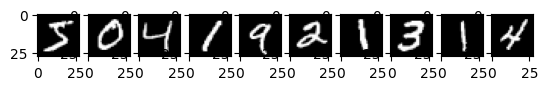

number of training images: 60000
number of test images: 10000


In [21]:
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# print out first 10 images in our training data
imgplot = show_images(x_train[0:10])

# check the size of our dataset
print("number of training images:",x_train.shape[0])
print("number of test images:",y_test.shape[0])

Now we know the how many images we have in training data, and we know the structure of MLP.  
  
**How to make image into MLP input?**    
Simply, we make it into a vector.

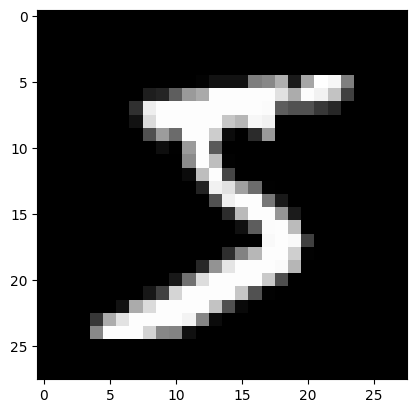

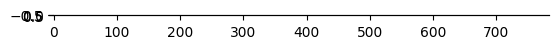

In [22]:
sample = x_train[0]

# origin image
show_image(sample)

# input of MLP, a images were transfer into a vector
show_image(sample.reshape(1, 28 * 28))

In [23]:
# update all the training, testing dataset.
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize them into range [0, 1]
x_train /= 255
x_test /= 255

**Why Normalize need to divide by 255 for image?**  

In computer vision, the color space were
R \[0,255\]
G \[0,255\]
B \[0,255\]

While we use gray images, the color space of R G B were same.  
We can take color space \[3, High, Weight\] of an image as
\[1, High, Weight\].  
Same as \[H, W\]  

## Prepare your first model  
  
In Keras, you can create model layers like a Queue.  

In [24]:
from tensorflow.keras import layers

num_classes = 10

# create a Sequential model
model = keras.Sequential(
    [
        # input layer. input data with size 28*28 and output size 256
        # 256 means you set up your modul with 256 NN in this layer. This value is up to you.
        layers.Dense(256, input_shape=(28*28,), activation='relu'),

        # hidden layer. input data with size 256, which were same to output of input layer.
        # output size 256, we set up 256 NN again in this hidden layer.
        # no need to give input size here because keras already know.
        layers.Dense(256, activation='relu'),

        # output layer. the number of output should be your number of classification
        layers.Dense(num_classes, activation='softmax')
    ]
);

# print out model structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile your model
We can now move on to compile our model.  
Here are the parameters:  
- optimizer : how to optimize your weights.
- loss : loss function.
- metrics : how to evaluate your model.

we don't disscuss how to select your optimizer and loss here. :)  
Let's introduce 2 important setting in Machine Learning.
- Batch : there are 2 ways to update your weights in model  
    - update everytime after watching **an** input.
    - update once after watching **batch** of inputs.  
      
    here we update once for 1000 inputs.  
- Epochs : how many times you want to look overwhole your datas.

Then, we define a *criterion*, PyTorch's name for a loss/cost/error function. This function will take in your model's predictions with the actual labels and then compute the loss/cost/error of your model with its current parameters.

`CrossEntropyLoss` both computes the *softmax* activation function on the supplied predictions as well as the actual loss via *negative log likelihood*.

Briefly, the softmax function is:

$$\text{softmax }(\mathbf{x}) = \frac{e^{x_i}}{\sum_j e^{x_j}}$$

This turns out 10 dimensional output, where each element is an unbounded real number, into a probability distribution over 10 elements. That is, all values are between 0 and 1, and together they all sum to 1.

Why do we turn things into a probability distribution? So we can use negative log likelihood for our loss function, as it expects probabilities. PyTorch calculates negative log likelihood for a single example via:

$$\text{negative log likelihood }(\mathbf{\hat{y}}, y) = -\log \big( \text{softmax}(\mathbf{\hat{y}})[y] \big)$$

$\mathbf{\hat{y}}$ is the $\mathbb{R}^{10}$ output, from our neural network, whereas $y$ is the label, an integer representing the class. The loss is the negative log of the class index of the softmax. For example:

$$\mathbf{\hat{y}} = [5,1,1,1,1,1,1,1,1,1]$$

$$\text{softmax }(\mathbf{\hat{y}}) = [0.8585, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157]$$

If the label was class zero, the loss would be:

$$\text{negative log likelihood }(\mathbf{\hat{y}}, 0) = - \log(0.8585) = 0.153 \dots$$

If the label was class five, the loss would be:

$$\text{negative log likelihood }(\mathbf{\hat{y}}, 5) = - \log(0.0157) = 4.154 \dots$$

So, intuitively, as your model's output corresponding to the correct class index increases, your loss decreases.

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

batch_size = 256
epochs = 10
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2190 - accuracy: 0.9341 - val_loss: 0.1101 - val_accuracy: 0.9648
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0889 - accuracy: 0.9724 - val_loss: 0.0965 - val_accuracy: 0.9725
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0589 - accuracy: 0.9817 - val_loss: 0.0840 - val_accuracy: 0.9743
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0426 - accuracy: 0.9859 - val_loss: 0.1124 - val_accuracy: 0.9691
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0370 - accuracy: 0.9882 - val_loss: 0.0990 - val_accuracy: 0.9751
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0288 - accuracy: 0.9902 - val_loss: 0.0944 - val_accuracy: 0.9766
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.0975 - val_acc

## Check result of model

How it works on testing data?  

In [26]:
scores, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores)
print('Test accuracy:', acc)

Test loss: 0.09290417283773422
Test accuracy: 0.9785000085830688



  
It looks nice!   
  
Let's visualize our result by printing out 25 images of label and predict result.

313/313 [==============================] - 2s 5ms/step
Test prediction: [[1.2743313e-11 4.2284778e-08 3.4613863e-09 ... 9.9998790e-01
  3.1205585e-10 1.1595073e-06]
 [2.8549842e-19 1.9461214e-11 9.9999994e-01 ... 1.3877919e-13
  2.1468030e-17 1.2963914e-26]
 [3.2905923e-08 9.9998969e-01 1.3707515e-06 ... 1.1012576e-06
  7.2920584e-06 1.0897713e-10]
 ...
 [1.8164501e-14 4.6706681e-14 8.7529105e-14 ... 5.4070734e-11
  5.9111010e-12 6.2461847e-10]
 [3.2190945e-18 5.0282999e-22 5.3795770e-22 ... 1.4982612e-21
  8.2284587e-12 1.5714436e-17]
 [6.4866270e-16 2.0954058e-20 7.2189366e-22 ... 2.1201378e-28
  4.2041845e-16 3.2371882e-23]]


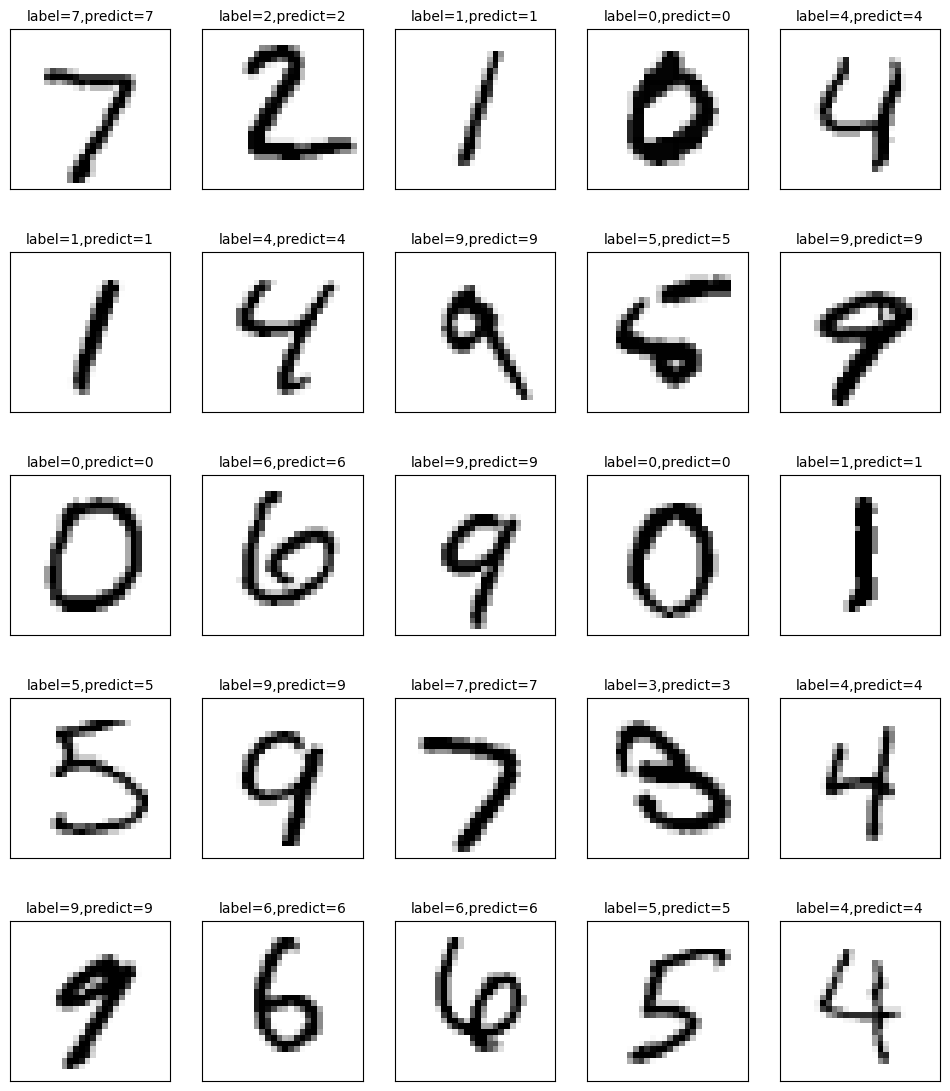

In [27]:
import numpy as np
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

print('Test prediction:', predictions)

i = 0  # start from 0
j = 25 # end at 25

(_, _), (x_test_image, y_test_label) = mnist.load_data()
plot_images_labels_prediction(x_test_image,y_test_label,predicted_classes,i,j)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


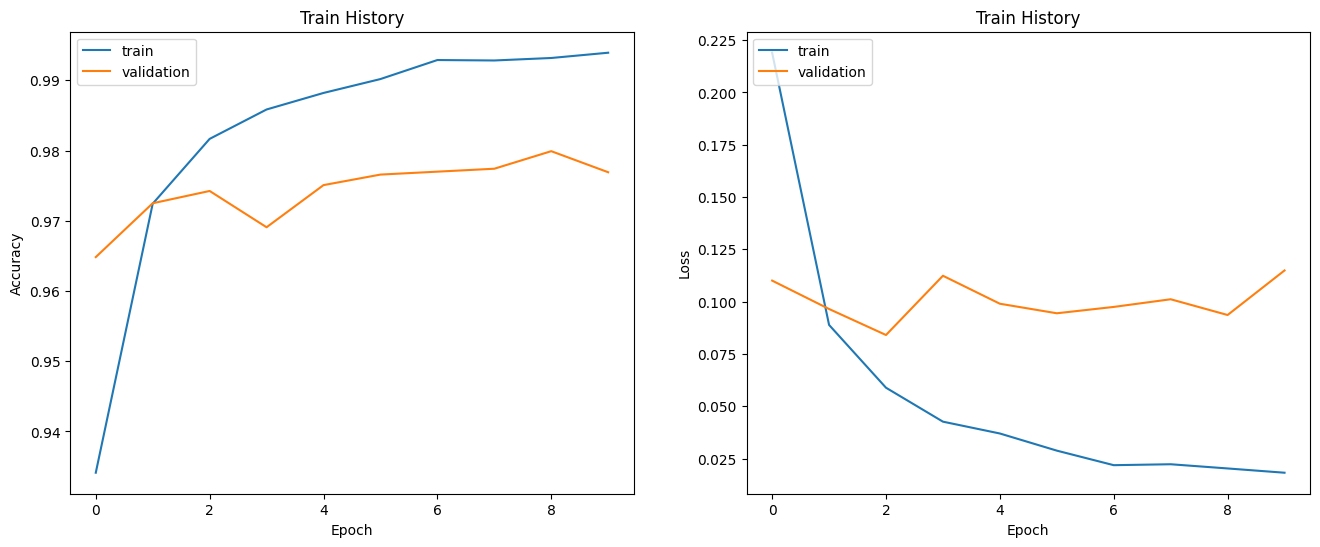

In [28]:
#show train history
show_train_history(history)

In [29]:
import pandas as pd

# create confusion matrix
pd.crosstab(y_test_label, predicted_classes, rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,970,0,0,1,1,1,3,0,3,1
1,0,1118,0,2,0,2,1,0,12,0
2,1,1,1006,4,1,1,3,1,14,0
3,1,0,0,978,0,11,0,5,5,10
4,1,0,1,0,960,0,6,1,1,12
5,1,0,0,2,0,881,2,1,2,3
6,3,2,0,1,4,4,942,0,2,0
7,2,3,6,5,3,0,1,987,3,18
8,0,0,2,5,2,2,2,1,954,6


#Assignment
Fill the code below.


In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [31]:
# Build an MLP model

In [32]:
# Compile the model, choose optimizer, loss and metrics

In [33]:
# Train the model and save the history. Define epochs, batch_size and validation_split

In [34]:
# Plot training & validation accuracy values and loss values per epoch

In [35]:
# Evaluate the model on the test set and report test accuracy

In [36]:
# Explore the impact of different hyper-parameters e.g. number of hidden layers on training and testing performance

In [ ]:
# Explore the impact of training set size on training and testing performance (keep the same testing set while varying the training set)